This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 6ms/step - loss: 0.6320 - accuracy: 0.8121 - val_loss: 0.2748 - val_accuracy: 0.9187
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2476 - accuracy: 0.9229 - val_loss: 0.1792 - val_accuracy: 0.9464
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1611 - accuracy: 0.9493 - val_loss: 0.1666 - val_accuracy: 0.9509
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1148 - accuracy: 0.9641 - val_loss: 0.1759 - val_accuracy: 0.9488
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0839 - accuracy: 0.9743 - val_loss: 0.1449 - val_accuracy: 0.9575
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0631 - accuracy: 0.9794 - val_loss: 0.1532 - val_accuracy: 0.9556
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0443 - accuracy: 0.9851 - val_loss: 0.1200 - val_accuracy: 0.9656
Epoch 

**Plotting a validation accuracy comparison**

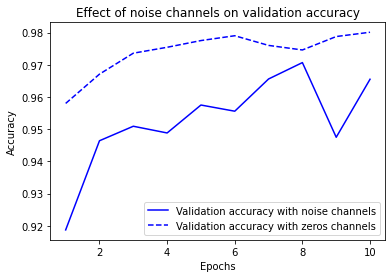

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3178 - accuracy: 0.1013 - val_loss: 2.3062 - val_accuracy: 0.1059
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3009 - accuracy: 0.1132 - val_loss: 2.3127 - val_accuracy: 0.1032
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2921 - accuracy: 0.1256 - val_loss: 2.3212 - val_accuracy: 0.1013
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2785 - accuracy: 0.1391 - val_loss: 2.3265 - val_accuracy: 0.1023
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2616 - accuracy: 0.1524 - val_loss: 2.3357 - val_accuracy: 0.1011
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2399 - accuracy: 0.1644 - val_loss: 2.3478 - val_accuracy: 0.1023
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2164 - accuracy: 0.1811 - val_loss: 2.3662 - val_accuracy: 0.1010

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 7ms/step - loss: 822.5166 - accuracy: 0.4086 - val_loss: 2.5804 - val_accuracy: 0.2938
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 6.4220 - accuracy: 0.2858 - val_loss: 2.1905 - val_accuracy: 0.2485
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 3.5839 - accuracy: 0.2698 - val_loss: 2.5473 - val_accuracy: 0.2741
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 3.9952 - accuracy: 0.2795 - val_loss: 2.6821 - val_accuracy: 0.3246
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.8050 - accuracy: 0.2845 - val_loss: 2.6318 - val_accuracy: 0.2908
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5931 - accuracy: 0.2664 - val_loss: 2.0814 - val_accuracy: 0.2934
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.9940 - accuracy: 0.2952 - val_loss: 2.0524 - val_accuracy: 0.2837
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.3549 - accuracy: 0.9133 - val_loss: 0.1684 - val_accuracy: 0.9558
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1420 - accuracy: 0.9626 - val_loss: 0.1416 - val_accuracy: 0.9684
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1125 - accuracy: 0.9734 - val_loss: 0.1725 - val_accuracy: 0.9666
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0976 - accuracy: 0.9778 - val_loss: 0.2446 - val_accuracy: 0.9606
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0884 - accuracy: 0.9819 - val_loss: 0.1909 - val_accuracy: 0.9723
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0752 - accuracy: 0.9851 - val_loss: 0.2425 - val_accuracy: 0.9712
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0749 - accuracy: 0.9862 - val_loss: 0.3253 - val_accuracy: 0.9618
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6658 - accuracy: 0.8386 - val_loss: 0.3596 - val_accuracy: 0.9024
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3510 - accuracy: 0.9042 - val_loss: 0.3071 - val_accuracy: 0.9135
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3155 - accuracy: 0.9115 - val_loss: 0.2890 - val_accuracy: 0.9206
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2996 - accuracy: 0.9163 - val_loss: 0.2815 - val_accuracy: 0.9215
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2901 - accuracy: 0.9191 - val_loss: 0.2744 - val_accuracy: 0.9244
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2830 - accuracy: 0.9205 - val_loss: 0.2728 - val_accuracy: 0.9257
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2778 - accuracy: 0.9217 - val_loss: 0.2702 - val_accuracy: 0.9251
Epoch 

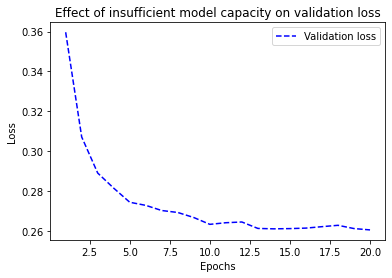

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3607 - accuracy: 0.8952 - val_loss: 0.2064 - val_accuracy: 0.9386
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1591 - accuracy: 0.9523 - val_loss: 0.1295 - val_accuracy: 0.9617
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1110 - accuracy: 0.9672 - val_loss: 0.1394 - val_accuracy: 0.9589
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0866 - accuracy: 0.9732 - val_loss: 0.0996 - val_accuracy: 0.9697
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0684 - accuracy: 0.9794 - val_loss: 0.0932 - val_accuracy: 0.9739
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0563 - accuracy: 0.9826 - val_loss: 0.0936 - val_accuracy: 0.9737
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0938 - val_accuracy: 0.9726
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 41ms/step - loss: 0.5195 - accuracy: 0.7736 - val_loss: 0.3962 - val_accuracy: 0.8639
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3051 - accuracy: 0.9017 - val_loss: 0.2998 - val_accuracy: 0.8878
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2224 - accuracy: 0.9282 - val_loss: 0.3176 - val_accuracy: 0.8723
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1741 - accuracy: 0.9439 - val_loss: 0.2922 - val_accuracy: 0.8815
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1412 - accuracy: 0.9556 - val_loss: 0.3211 - val_accuracy: 0.8721
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1170 - accuracy: 0.9634 - val_loss: 0.2946 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0962 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6091 - accuracy: 0.7360 - val_loss: 0.5227 - val_accuracy: 0.8442
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4599 - accuracy: 0.8733 - val_loss: 0.4282 - val_accuracy: 0.8692
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3686 - accuracy: 0.8986 - val_loss: 0.3714 - val_accuracy: 0.8736
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3041 - accuracy: 0.9143 - val_loss: 0.3263 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2566 - accuracy: 0.9253 - val_loss: 0.3014 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2200 - accuracy: 0.9355 - val_loss: 0.2864 - val_accuracy: 0.8898
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1923 - accuracy: 0.9432 - val_loss: 0.2787 - val_accuracy: 0.8898
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5435 - accuracy: 0.7500 - val_loss: 0.2962 - val_accuracy: 0.8882
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2444 - accuracy: 0.9035 - val_loss: 0.3169 - val_accuracy: 0.8600
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1534 - accuracy: 0.9419 - val_loss: 0.2727 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0838 - accuracy: 0.9722 - val_loss: 0.3524 - val_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0126 - accuracy: 0.9971 - val_loss: 0.4738 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2127 - accuracy: 0.9716 - val_loss: 0.3777 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.5195 - val_accuracy: 0.8871
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5794 - accuracy: 0.7871 - val_loss: 0.4475 - val_accuracy: 0.8755
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3889 - accuracy: 0.8974 - val_loss: 0.3812 - val_accuracy: 0.8847
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3228 - accuracy: 0.9181 - val_loss: 0.3627 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2933 - accuracy: 0.9266 - val_loss: 0.3581 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2701 - accuracy: 0.9373 - val_loss: 0.3595 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2615 - accuracy: 0.9381 - val_loss: 0.3746 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2547 - accuracy: 0.9409 - val_loss: 0.3737 - val_accuracy: 0.8823
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.6421 - accuracy: 0.6231 - val_loss: 0.5395 - val_accuracy: 0.8379
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5281 - accuracy: 0.7587 - val_loss: 0.4292 - val_accuracy: 0.8746
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4395 - accuracy: 0.8222 - val_loss: 0.3533 - val_accuracy: 0.8772
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3792 - accuracy: 0.8601 - val_loss: 0.3114 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3262 - accuracy: 0.8857 - val_loss: 0.2896 - val_accuracy: 0.8941
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2815 - accuracy: 0.9085 - val_loss: 0.2883 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2532 - accuracy: 0.9199 - val_loss: 0.2904 - val_accuracy: 0.8873
Epoch 8/20
30

## Summary